<a href="https://colab.research.google.com/github/ollyfenwickdrodge/Python-week-1/blob/main/Assignment_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('loans_dataset.csv')

In [9]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [5]:
keep_cols = [ "interest_rate", "verified_income", "debt_to_income",
              "total_credit_utilized", "total_credit_limit", "public_record_bankrupt",
              "loan_purpose", "term", "inquiries_last_12m", "issue_month",
              "annual_income", "loan_amount", "grade", "emp_length", "homeownership"]

In [6]:
original_n = df.shape[0]

In [7]:
df_clean = df[keep_cols].copy()

In [8]:
df_clean.rename(columns={"inquiries_last_12m": "credit_checks"}, inplace=True)

In [10]:
df_clean

,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,credit_checks,issue_month,annual_income,loan_amount,grade,emp_length,homeownership
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.35,Source Verified,22.28,77963,199195,1,other,36,5,Jan-2018,108000.0,24000,A,10.0,RENT
9996,19.03,Verified,32.38,101571,382061,0,debt_consolidation,36,1,Feb-2018,121000.0,10000,D,8.0,MORTGAGE
9997,23.88,Verified,45.26,95421,346402,0,debt_consolidation,36,0,Feb-2018,67000.0,30000,E,10.0,MORTGAGE
9998,5.32,Source Verified,11.99,27641,294475,0,other,36,1,Feb-2018,80000.0,24000,A,1.0,MORTGAGE


In [11]:
df_clean = df_clean.dropna(subset=["interest_rate"])

In [12]:
clean_n = df_clean.shape[0]

In [13]:
print("Number of observations before cleaning:", original_n)
print("Number of observations after cleaning:", clean_n)

Number of observations before cleaning: 10000
Number of observations after cleaning: 10000


In [ ]:
summary_stats = df_clean.describe(include="all")
print("\nSummary statistics (cleaned dataset):")
print(summary_stats)


Summary statistics (cleaned dataset):
        interest_rate  verified_income  debt_to_income  total_credit_utilized  \
count    10000.000000            10000     9976.000000           10000.000000   
unique            NaN                3             NaN                    NaN   
top               NaN  Source Verified             NaN                    NaN   
freq              NaN             4116             NaN                    NaN   
mean        12.427524              NaN       19.308192           51049.063100   
std          5.001105              NaN       15.004851           53636.731172   
min          5.310000              NaN        0.000000               0.000000   
25%          9.430000              NaN       11.057500           19185.500000   
50%         11.980000              NaN       17.570000           36927.000000   
75%         15.050000              NaN       25.002500           65421.000000   
max         30.940000              NaN      469.090000          942456

Numerical variables

In [ ]:
num_vars = ["interest_rate", "annual_income", "debt_to_income", "loan_amount"]
num_desc = df_clean[num_vars].agg(["mean", "median", "std", "min", "max"]).T
print("\nDescriptive stats for numeric variables:")
print(num_desc)


Descriptive stats for numeric variables:
                        mean    median           std      min         max
interest_rate      12.427524     11.98      5.001105     5.31       30.94
annual_income   79222.148412  65000.00  64734.290492     0.00  2300000.00
debt_to_income     19.308192     17.57     15.004851     0.00      469.09
loan_amount     16361.922500  14500.00  10301.956759  1000.00    40000.00


Categorical variables

In [ ]:
cat_vars = ["grade"]

In [ ]:
for v in cat_vars:
  print(f"{v} : {df_clean[v].nunique(dropna=False)}")

verified_income : 3


In [ ]:
cat_vars = ["homeownership"]

In [ ]:
cat_vars = ["verified_income"]

In [ ]:
print(f"{v} : {df_clean[v].nunique(dropna=False)}")

verified_income : 3


In [ ]:
cat_vars_to_check = ["homeownership", "grade"]
print("\nNumber of unique categories:")
for var in cat_vars_to_check:
    print(f"{var}: {df_clean[var].nunique(dropna=False)}")


Number of unique categories:
homeownership: 3
grade: 7


Frequencies

In [ ]:
cat_vars_for_frequencies = ["grade", "verified_income","homeownership"]
for var in cat_vars_for_frequencies:
    print(f"\nFrequency table for {var}:")
    print(df_clean[var].value_counts(dropna=False))


Frequency table for grade:
grade
B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: count, dtype: int64

Frequency table for verified_income:
verified_income
Source Verified    4116
Not Verified       3594
Verified           2290
Name: count, dtype: int64

Frequency table for homeownership:
homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64


Plotting histogram

<Axes: xlabel='interest_rate', ylabel='Count'>

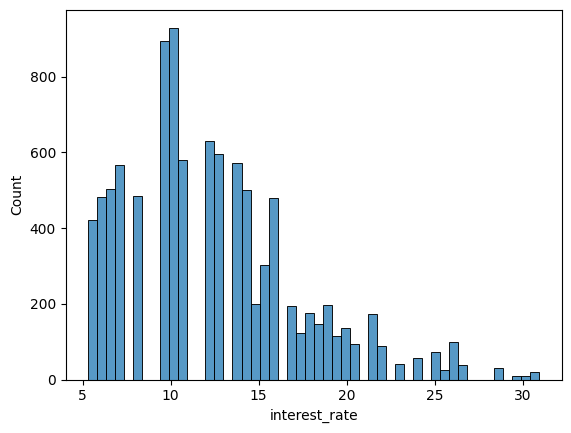

In [ ]:
sns.histplot(data=df,x='interest_rate',kde=False)

Choosing amount of bins

Text(0.5, 1.0, 'Interest rate histogram')

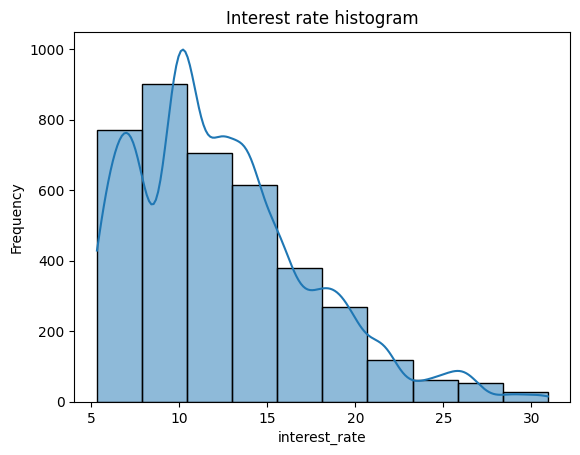

In [ ]:
sns.histplot(data=df,x='interest_rate',bins=10,stat='frequency',kde=True)
plt.title('Interest rate histogram')

Text(0, 0.5, 'Frequency')

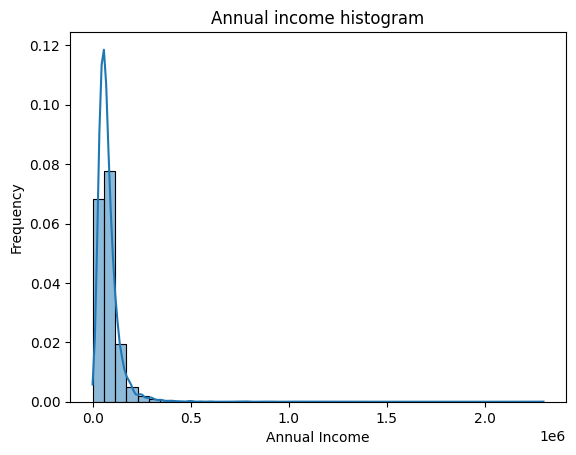

In [ ]:
sns.histplot(data=df,x='annual_income',bins=40,stat='frequency',kde=True)
plt.title('Annual income histogram')
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

Annual income vs Interest rate Scatterplot

Text(0, 0.5, 'Interest rate(%)')

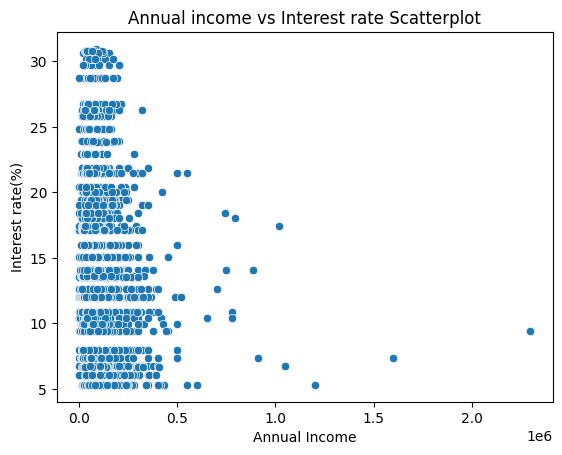

In [ ]:
sns.scatterplot(data=df_clean,
    x="annual_income",
    y="interest_rate")
plt.title('Annual income vs Interest rate Scatterplot')
plt.xlabel("Annual Income")
plt.ylabel("Interest rate(%)")

Text(0, 0.5, 'Interest rate(%)')

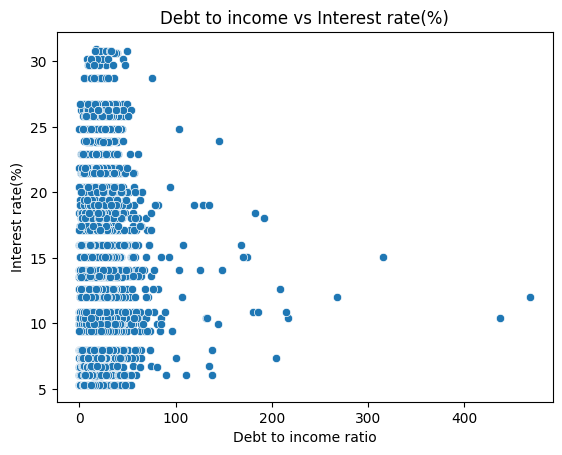

In [ ]:
sns.scatterplot(data=df_clean,
    x="debt_to_income",
    y="interest_rate")
plt.title('Debt to income vs Interest rate(%)')
plt.xlabel("Debt to income ratio")
plt.ylabel("Interest rate(%)")

Boxplots

Text(0, 0.5, 'Interest rate (%)')

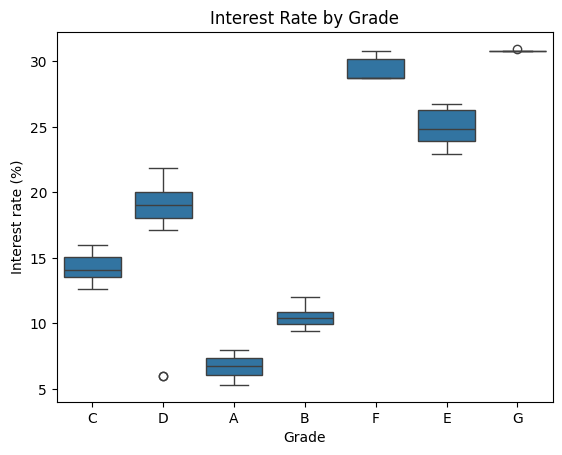

In [ ]:
sns.boxplot(data=df_clean, x="grade", y="interest_rate")
plt.title("Interest Rate by Grade")
plt.xlabel("Grade")
plt.ylabel("Interest rate (%)")


Text(0, 0.5, 'Interest rate (%)')

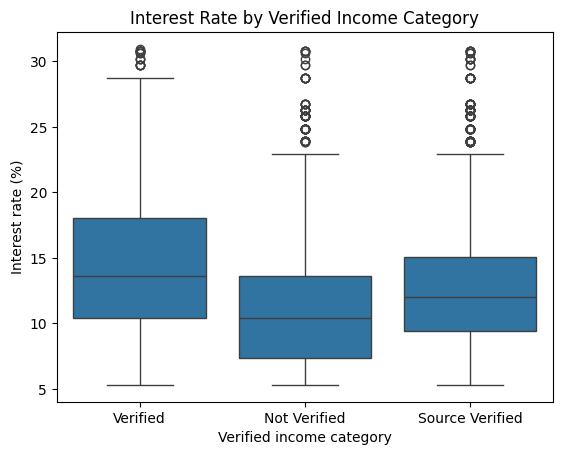

In [ ]:
sns.boxplot(data=df_clean, x="verified_income", y="interest_rate")
plt.title("Interest Rate by Verified Income Category")
plt.xlabel("Verified income category")
plt.ylabel("Interest rate (%)")

Text(0, 0.5, 'Interest rate (%)')

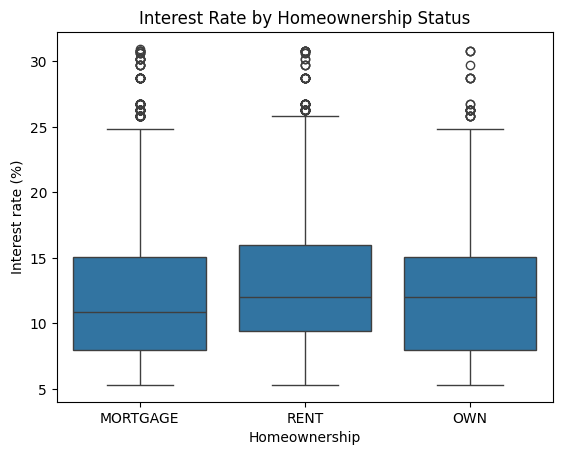

In [ ]:
sns.boxplot(data=df_clean, x="homeownership", y="interest_rate")
plt.title("Interest Rate by Homeownership Status")
plt.xlabel("Homeownership")
plt.ylabel("Interest rate (%)")

In [ ]:
credit_util = df_clean["total_credit_utilized"] / df_clean["total_credit_limit"]
credit_util = credit_util.replace([np.inf, -np.inf], np.nan).fillna(0)
credit_util[df_clean["total_credit_limit"] == 0] = 0

In [ ]:
bankruptcy_dummy = (df_clean["public_record_bankrupt"] >= 1).astype(int)
df_clean["bankruptcy_dummy"] = bankruptcy_dummy

In [ ]:
credit_util_mean = credit_util.mean()
credit_util_nonzero_prop = (credit_util !=0).mean()
bankruptcy_mean = bankruptcy_dummy.mean()
bankruptcy_nonzero_prop = (bankruptcy_dummy !=0).mean()

In [ ]:
print("\nDerived variables:")
print(f"credit_util mean: {credit_util_mean:.4f}")
print(f"credit_util proportion non-zero: {credit_util_nonzero_prop:.4f}")
print(f"bankruptcy_dummy mean: {bankruptcy_mean:.4f}")
print(f"bankruptcy_dummy proportion non-zero: {bankruptcy_nonzero_prop:.4f}")


Derived variables:
credit_util mean: 0.4031
credit_util proportion non-zero: 0.9972
bankruptcy_dummy mean: 0.1215
bankruptcy_dummy proportion non-zero: 0.1215


Regression

Interest rate - Debt to income ratio

In [24]:
m1_alt = smf.ols("interest_rate ~ debt_to_income", data=df_clean).fit()
print("\nModel 1 (using df_clean and smf.ols):")
print(m1_alt.summary())


Model 1 (using df_clean and smf.ols):
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        17:01:31   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inter

Interest rate - Loan amount

In [ ]:
m2_alt = smf.ols("interest_rate ~ loan_amount", data=df_clean).fit()
print("\nModel 2 (using df_clean and smf.ols):")
print(m2_alt.summary())


Model 2:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     41.80
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           1.06e-10
Time:                        21:54:10   Log-Likelihood:                -30265.
No. Observations:               10000   AIC:                         6.053e+04
Df Residuals:                    9998   BIC:                         6.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.9150      0.094    127

Interest rate - Verified income

In [23]:
m3_alt = smf.ols("interest_rate ~ C(verified_income)", data=df_clean).fit()
print("\nModel 3 (using df_clean and smf.ols):")
print(m3_alt.summary())

# Re-calculate reference category and average interest rate using df_clean for consistency
temp_df_for_ref = df_clean.dropna(subset=["verified_income"])
ref_cat_alt = sorted(temp_df_for_ref["verified_income"].unique())[0]
print("Reference category (verified_income):", ref_cat_alt)

if "Not Verified" in temp_df_for_ref["verified_income"].unique():
    avg_not_ver_alt = temp_df_for_ref.loc[temp_df_for_ref["verified_income"] == "Not Verified", "interest_rate"].mean()
else:
    avg_not_ver_alt = np.nan
print("Average interest rate for 'Not Verified':", avg_not_ver_alt)


Model 3 (using df_clean and smf.ols):
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        17:00:58   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Interest rate - Debt to income ratio + Loan amount

In [25]:
m4_alt = smf.ols("interest_rate ~ debt_to_income + loan_amount", data=df_clean).fit()
print("\nModel 4 (using df_clean and smf.ols):")
print(m4_alt.summary())


Model 4 (using df_clean and smf.ols):
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     119.1
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           7.38e-52
Time:                        17:02:13   Log-Likelihood:                -30089.
No. Observations:                9976   AIC:                         6.018e+04
Df Residuals:                    9973   BIC:                         6.020e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inter

In [26]:
required_cols = [
    "interest_rate", "debt_to_income", "loan_amount", "annual_income",
    "term", "grade", "emp_length", "homeownership", "loan_purpose",
    "credit_checks"]
d5 = df_clean[required_cols].dropna().copy()
numerical_vars = [
    "debt_to_income", "loan_amount", "annual_income",
    "emp_length", "credit_checks"]
categorical_vars = [
    "term", "grade", "homeownership", "loan_purpose"]
X5_num = d5[numerical_vars]

X5_cat_list = []
reference_categories = {}
for col in categorical_vars:
    if col == 'term':
        d5[col] = d5[col].astype(str)

    dummies = pd.get_dummies(d5[col], prefix=col, drop_first=True).astype(int)
    X5_cat_list.append(dummies)
    unique_vals = d5[col].dropna().unique()

    sorted_unique_vals = sorted(unique_vals.astype(str))
    reference_categories[col] = sorted_unique_vals[0] if len(sorted_unique_vals) > 0 else "N/A"

X5_cat = pd.concat(X5_cat_list, axis=1)
X5 = sm.add_constant(pd.concat([X5_num, X5_cat], axis=1))

m5 = sm.OLS(d5["interest_rate"], X5).fit()
print("\nModel 5 Summary:")
print(m5.summary())
print("\nModel 5 residuals (first 5 observations):")
print(m5.resid.head())
print("\nReference categories for categorical variables in Model 5:")
for var, ref_cat in reference_categories.items():
    print(f"- {var}: {ref_cat}")


Model 5 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     7229.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:02:25   Log-Likelihood:                -13894.
No. Observations:                9182   AIC:                         2.784e+04
Df Residuals:                    9156   BIC:                         2.803e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Regression results in table

In [28]:
credit_limit_nonzero = df_clean["total_credit_limit"].replace(0, np.nan)
df_clean["credit_util"] = (
    df_clean["total_credit_utilized"] / credit_limit_nonzero).fillna(0)
df_clean["bankruptcy_dummy"] = (df_clean["public_record_bankrupt"] >= 1).astype(int)

m1 = smf.ols("interest_rate ~ annual_income", data=df_clean).fit()
m2 = smf.ols("interest_rate ~ debt_to_income", data=df_clean).fit()
m3 = smf.ols("interest_rate ~ C(verified_income)", data=df_clean).fit()
m4 = smf.ols("interest_rate ~ annual_income + debt_to_income", data=df_clean).fit()
m5 = smf.ols(
    "interest_rate ~ annual_income + loan_amount + debt_to_income + "
    "credit_util + bankruptcy_dummy + C(term) + C(grade) + C(emp_length) + "
    "C(homeownership) + C(loan_purpose) + credit_checks",
    data=df_clean ).fit()


models = {"Model 1": m1, "Model 2": m2, "Model 3": m3, "Model 4": m4, "Model 5": m5}

def star(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

def coef_column(model):
    """Return a Series: 'coef (se)[stars]' for one model."""
    params = model.params
    ses = model.bse
    pvals = model.pvalues
    out = {}
    for name in params.index:
        s = f"{params[name]:.4f} ({ses[name]:.4f}){star(pvals[name])}"
        out[name] = s
    return pd.Series(out)

reg_table = pd.DataFrame({name: coef_column(model) for name, model in models.items()})

gof = pd.DataFrame({
    name: [model.rsquared, model.nobs, model.fvalue]
    for name, model in models.items()
}, index=["R_squared", "N", "F_stat"])

full_reg_table = pd.concat([reg_table, gof], axis=0)

In [29]:
print(full_reg_table)

                                                   Model 1  \
C(emp_length)[T.1.0]                                   NaN   
C(emp_length)[T.10.0]                                  NaN   
C(emp_length)[T.2.0]                                   NaN   
C(emp_length)[T.3.0]                                   NaN   
C(emp_length)[T.4.0]                                   NaN   
C(emp_length)[T.5.0]                                   NaN   
C(emp_length)[T.6.0]                                   NaN   
C(emp_length)[T.7.0]                                   NaN   
C(emp_length)[T.8.0]                                   NaN   
C(emp_length)[T.9.0]                                   NaN   
C(grade)[T.B]                                          NaN   
C(grade)[T.C]                                          NaN   
C(grade)[T.D]                                          NaN   
C(grade)[T.E]                                          NaN   
C(grade)[T.F]                                          NaN   
C(grade)